# Imported Necessary Libraries

In [1]:
# DataFrame handling
import pandas as pd

# Confusion matrix function
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# keras Models
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, normalize

print('Tensorflow imported')
print('Imported Necessary modules')

Tensorflow imported
Imported Necessary modules


# Read Data

In [2]:
def read_data(filePath):
    df = pd.read_csv(filePath)
    return df

In [3]:
df = read_data('./handwritten_data_785.csv')

# File shape, size, and description

In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
count,372037.000000,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,...,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0
mean,13.391641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.765867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(372037, 785)

# Getting X and y

In [7]:
def getX_gety():
    X = df.drop(labels=['0'], axis=1)
    y = df['0']
    return [X, y]

In [8]:
X, y = getX_gety()

In [9]:
X.shape

(372037, 784)

In [10]:
y.shape

(372037,)

# Plotting y : Target Value

In [11]:
def plot():
    plt.figure(figsize=(15,8))
    sn.countplot(y, palette="rocket")
    plt.title("Number of character classes" , fontsize=12)
    plt.xlabel('Character Classes', fontsize=12)
    plt.ylabel('Character Counts', fontsize=12)
    y.value_counts()

/Users/bkhadka/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


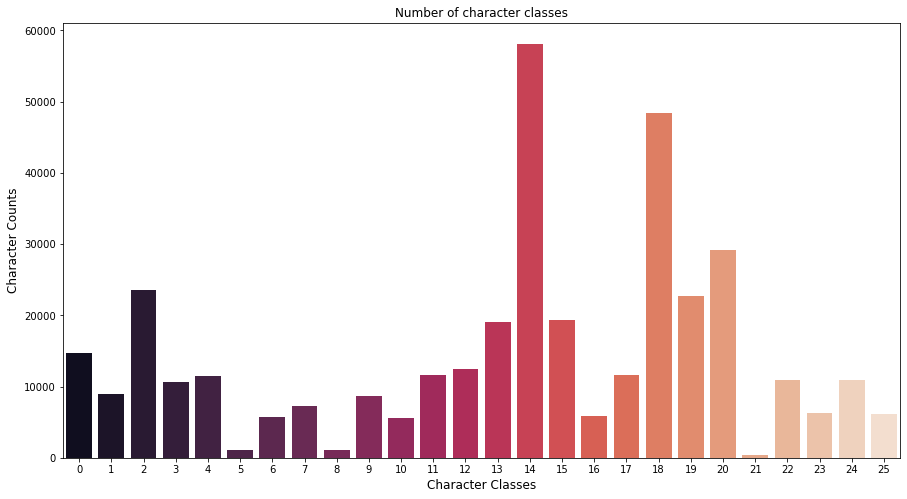

In [12]:
plot()

# Normalizing and Reshaping Data

In [13]:
X = X / 255.0
X = X.values.reshape(-1,28,28,1)

In [14]:
y = to_categorical(y, num_classes = 26) # Converting to one hot encoding

# Splitting a model

In [15]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_validation.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_validation.shape)

x_train shape (297629, 28, 28, 1)
x_test shape (74408, 28, 28, 1)
y_train shape (297629, 26)
y_test shape (74408, 26)


# Display the images

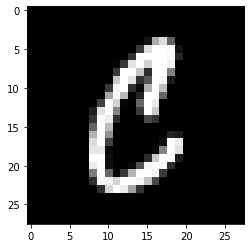

In [16]:
plt.imshow(X_train[200][:,:,0],cmap='gray')
plt.show()

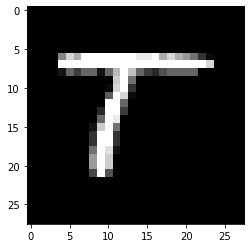

In [17]:
plt.imshow(X_validation[400][:,:,0],cmap='gray')
plt.show()

# Creating a CNN Model

In [18]:
def model():
    model = Sequential()
    model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(26, activation = "softmax"))
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model


In [19]:
model = model()

# Train Model

In [20]:
epochs = 10  # for better result increase the epochs
batch_size = 250
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
model.fit(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_validation,y_validation), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
1190/1190 [==============================] - 83s 69ms/step - loss: 1.2306 - accuracy: 0.6408 - val_loss: 0.1490 - val_accuracy: 0.9595
Epoch 2/10
1190/1190 [==============================] - 82s 69ms/step - loss: 0.3618 - accuracy: 0.8947 - val_loss: 0.1158 - val_accuracy: 0.9685
Epoch 3/10
1190/1190 [==============================] - 83s 69ms/step - loss: 0.2917 - accuracy: 0.9154 - val_loss: 0.1066 - val_accuracy: 0.9714
Epoch 4/10
1190/1190 [==============================] - 83s 70ms/step - loss: 0.2594 - accuracy: 0.9257 - val_loss: 0.0958 - val_accuracy: 0.9748
Epoch 5/10
1190/1190 [==============================] - 83s 69ms/step - loss: 0.2421 - accuracy: 0.9308 - val_loss: 0.0890 - val_accuracy: 0.9768
Epoch 6/10
1190/1190 [==============================] - 82s 69ms/step - loss: 0.2255 - accuracy: 0.9362 - val_loss: 0.0854 - val_accuracy: 0.9783
Epoch 7/10
1190/1190 [==============================] - 82s 69ms/step - loss: 0.2130 - accuracy: 0.9392 - val_loss: 0.0846 -

# Confusion Matrix

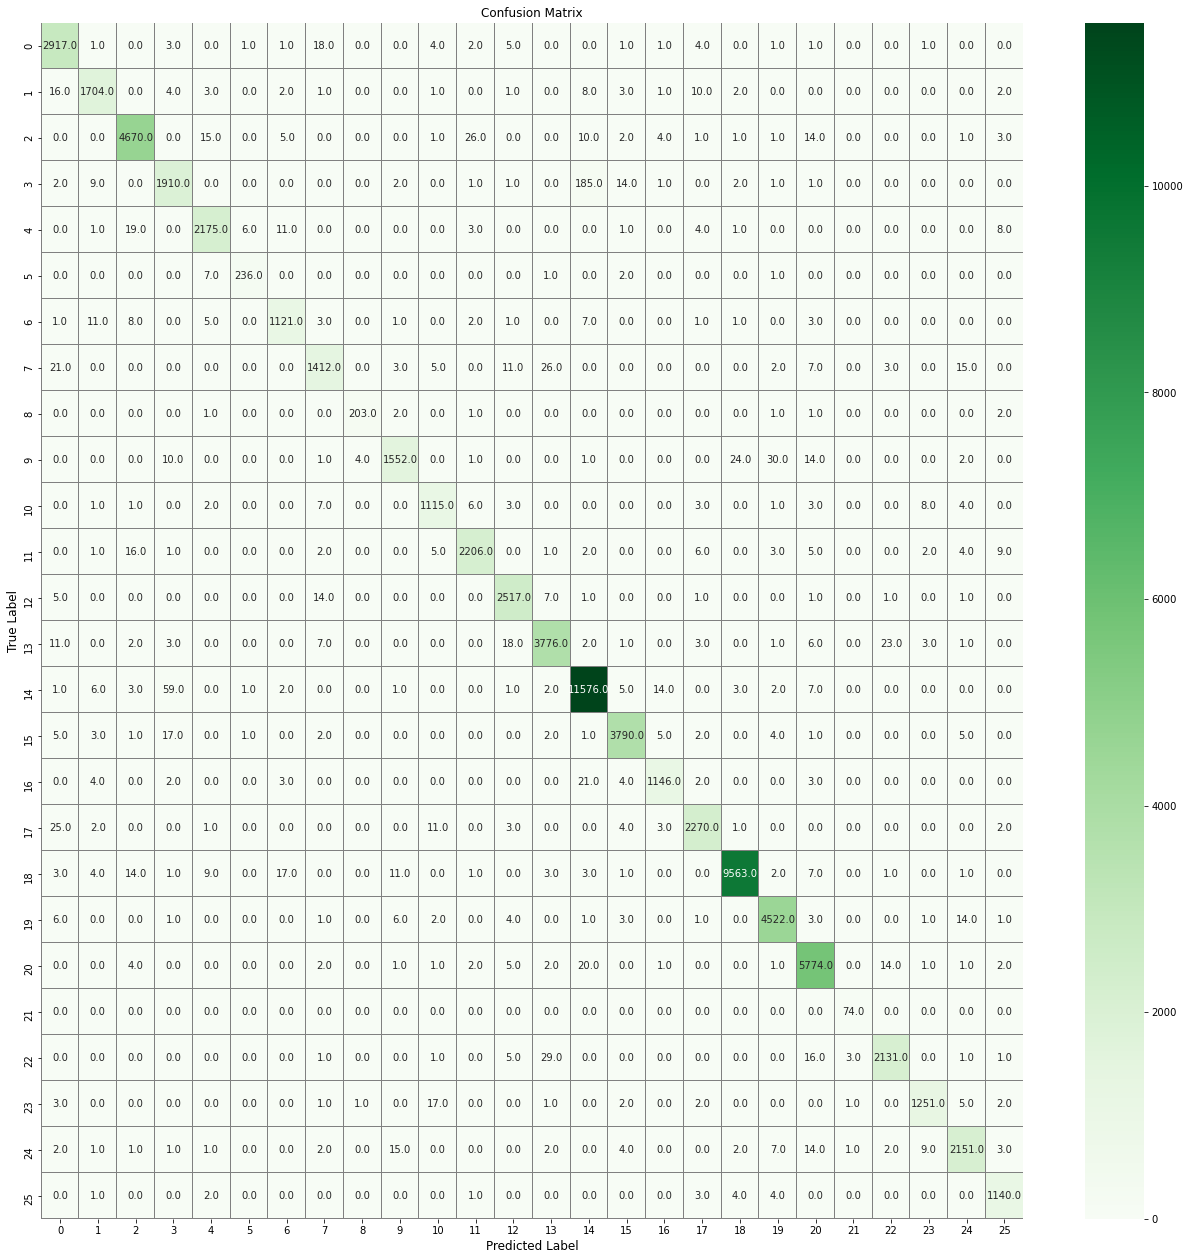

In [21]:
Y_pred = model.predict(X_validation)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_validation,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(22, 22))
sn.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [22]:
predictions = model.predict([X_validation])

In [23]:
predictions

array([[4.42368142e-09, 8.84918165e-07, 3.56854542e-07, ...,
        1.33836025e-07, 7.46466871e-03, 8.81118845e-10],
       [1.03330379e-02, 1.02313556e-04, 2.21019825e-08, ...,
        1.63948977e-09, 1.49739648e-11, 8.07983280e-09],
       [1.67304094e-07, 3.84146006e-06, 6.05584937e-05, ...,
        9.70849811e-13, 6.29793036e-08, 1.85659821e-11],
       ...,
       [4.73296495e-05, 1.17994559e-10, 1.83572191e-09, ...,
        1.26528203e-05, 1.89109358e-07, 8.62534531e-14],
       [1.51333529e-06, 8.57501173e-15, 7.22052279e-12, ...,
        6.87538405e-14, 2.53433125e-13, 7.94926524e-18],
       [1.39677956e-13, 2.89091889e-10, 4.12225972e-06, ...,
        9.77400626e-12, 5.46954311e-07, 1.14831986e-13]], dtype=float32)

In [24]:
print(np.argmax(predictions[24]))

20


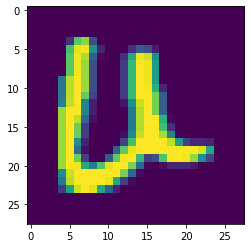

In [25]:
plt.imshow(X_validation[24])

In [144]:
model.save('Saved_Model')

INFO:tensorflow:Assets written to: Saved_Model/assets


In [146]:
from tensorflow import keras
reconstructed_model = keras.models.load_model('Saved_Model')

In [147]:
predictionsFromSavedModel = reconstructed_model.predict([X_validation])

In [148]:
print(np.argmax(predictionsFromSavedModel[24]))

20


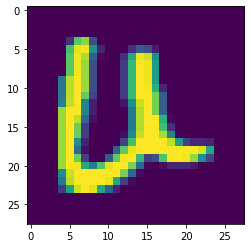

In [149]:
plt.imshow(X_validation[24])

In [26]:
import cv2

In [130]:
img = cv2.imread('Images/Bransen.png')

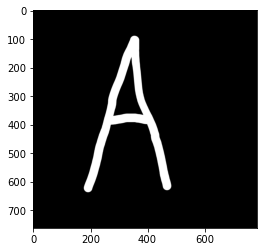

In [131]:
plt.imshow(img)

In [132]:
img.shape

(762, 784, 3)

In [133]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [134]:
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

In [135]:
resized.shape

(28, 28)

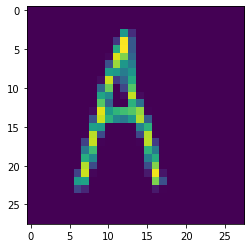

In [136]:
plt.imshow(resized)

In [137]:
import tensorflow as tf
newNormalizedImg = tf.keras.utils.normalize(resized, axis=1)

In [138]:
newNormalizedImg = np.array(newNormalizedImg).reshape(-1, 28, 28, 1)

In [139]:
newNormalizedImg.shape

(1, 28, 28, 1)

In [140]:
predictions = model.predict(newNormalizedImg)

In [141]:
predictionCharacter = np.argmax(predictions)

In [142]:
predictionDict = dict([(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L'), (12, 'M'), (13, 'N'), (14, 'O'), (15, 'P'), (16, 'Q'), (17, 'R'), (18, 'S'), (19, 'T'), (20, 'U'), (21, 'V'), (22, 'W'), (23, 'X'), (24, 'Y'), (25, 'Z')])

In [143]:
print("The predicted character is: {}".format(predictionDict[predictionCharacter]))

The predicted character is: A
